Exercise 7

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

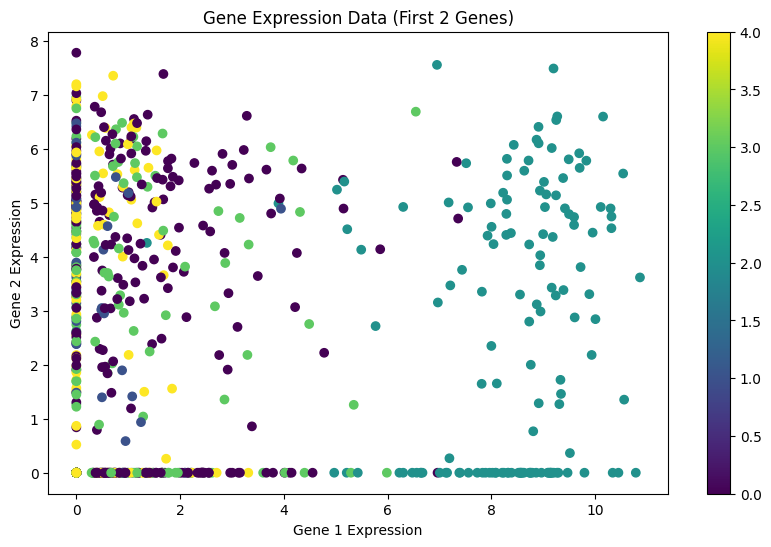

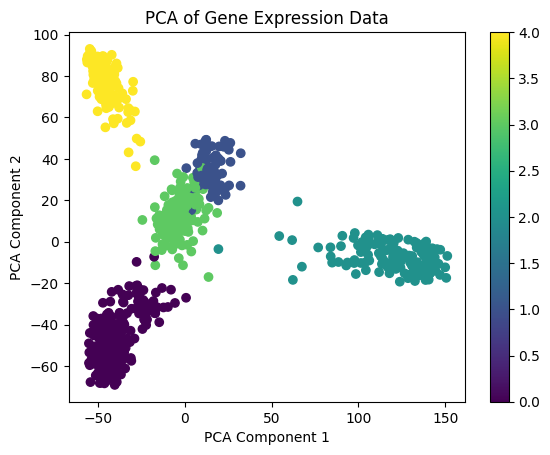

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


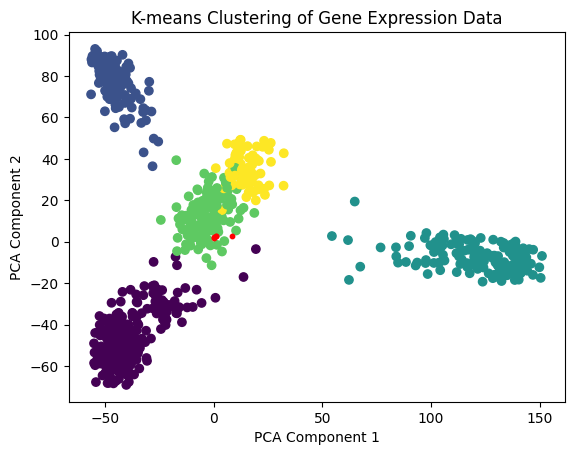

Top 10 important features (by index): [1973 2027 1976 1220  382 1194  820    5 1282  964]


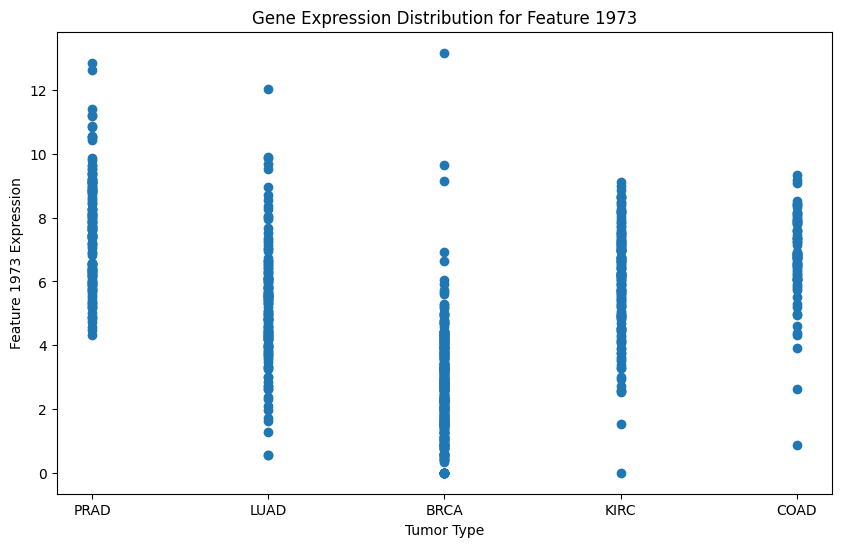

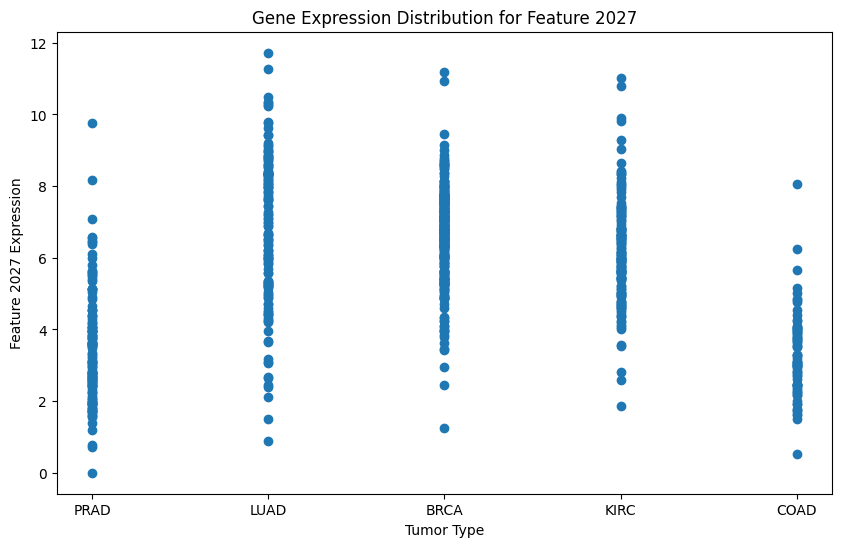

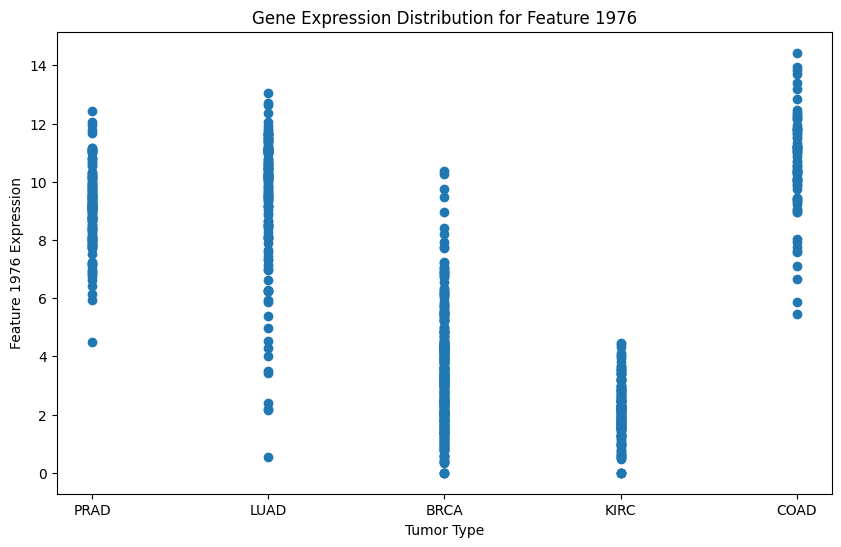

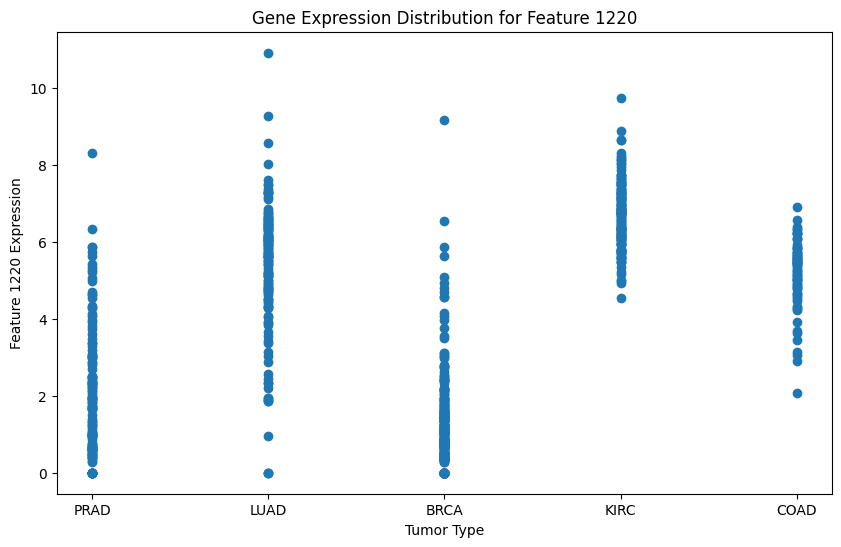

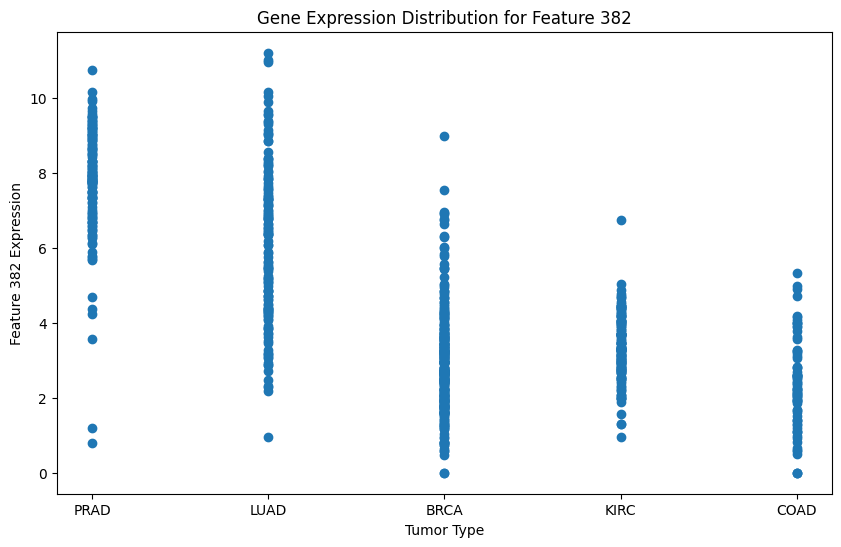

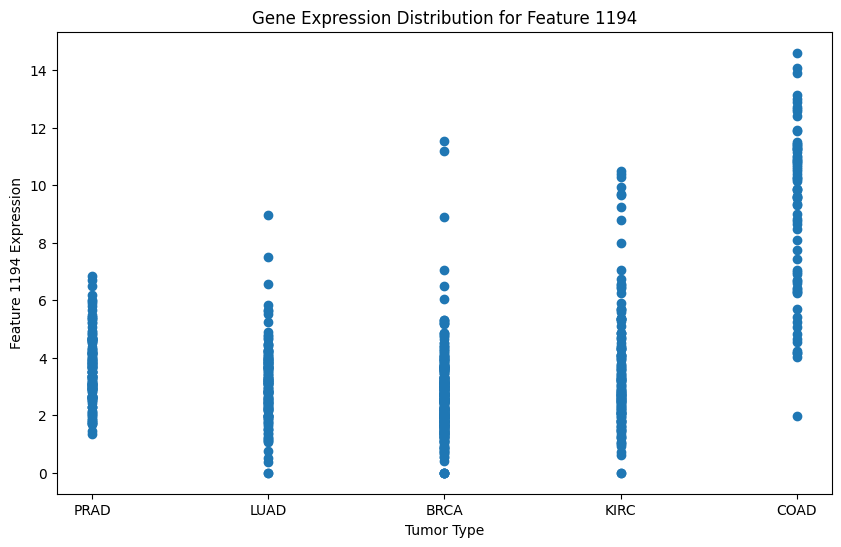

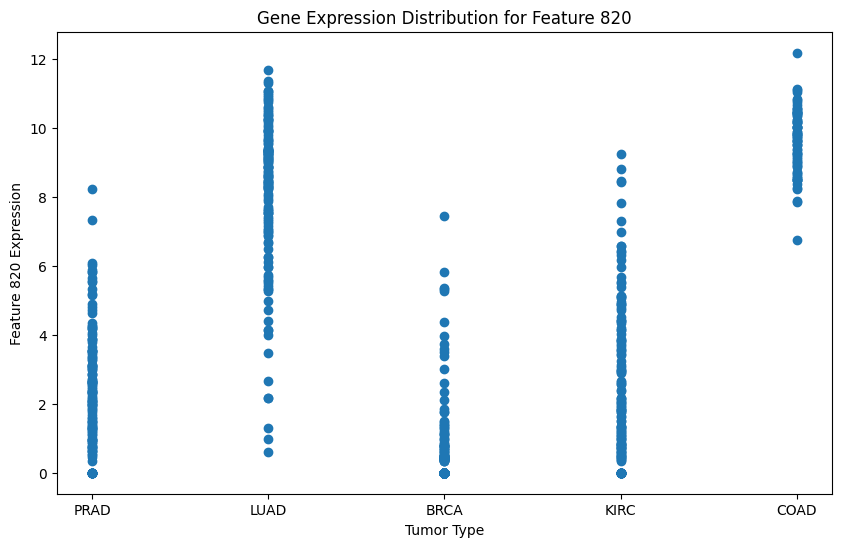

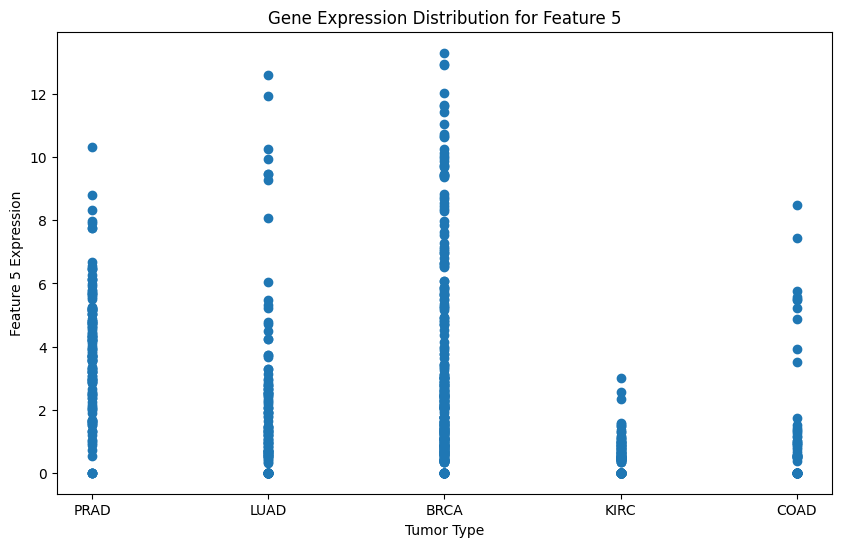

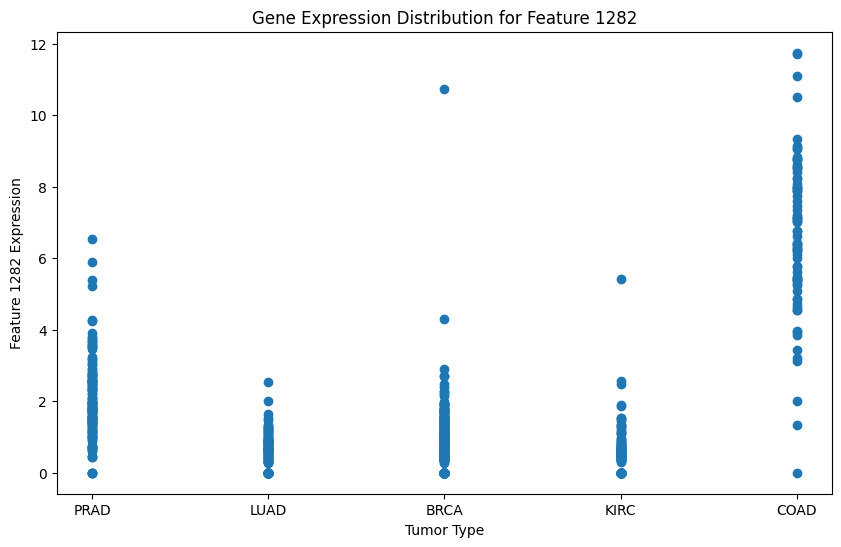

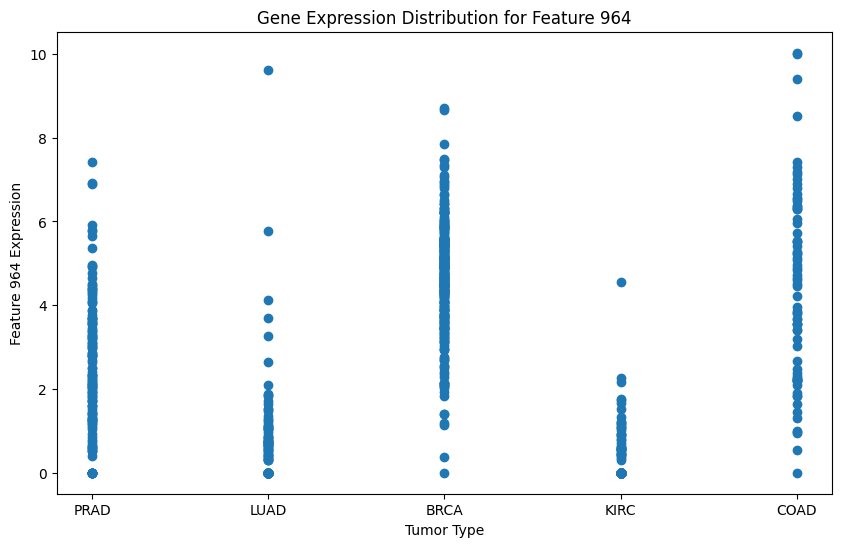

Accuracy: 1.0
Confusion Matrix:
 [[61  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 34  0]
 [ 0  0  0  0 28]]
Classification Report:
               precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        61
        COAD       1.00      1.00      1.00        14
        KIRC       1.00      1.00      1.00        22
        LUAD       1.00      1.00      1.00        34
        PRAD       1.00      1.00      1.00        28

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Loading gene expression data
gene_data = pd.read_csv('expressions.txt', header=None, delim_whitespace=True)
gene_data.set_index(0, inplace=True)

# Loading tumor type labels
labels_data = pd.read_csv('tcga-pancan-hiseqlabels.csv')
labels_data.columns = ['SampleID', 'TumorType']
labels_data.set_index('SampleID', inplace=True)

# Merging gene_data and labels_data into one data variable
data = gene_data.join(labels_data, how='inner')
X = data.iloc[:, :-1]
y = data['TumorType']

# Visualization before PCA
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.astype('category').cat.codes, cmap='viridis')
plt.xlabel('Gene 1 Expression')
plt.ylabel('Gene 2 Expression')
plt.title('Gene Expression Data (First 2 Genes)')
plt.colorbar()
plt.show()

# Initalizing PCA with the number of components I want to keep
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype('category').cat.codes, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Gene Expression Data')
plt.colorbar()
plt.show()


# K-means clusterng to get a sense of classifiability
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=10, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Gene Expression Data')
plt.show()



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that scales the data then applies SVM
svm_clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, random_state=42))

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Extract the coefficients from the SVM model
svm_linear = svm_clf.named_steps['svc']
coefficients = svm_linear.coef_


# Calculate feature importance
feature_importance = np.abs(coefficients).mean(axis=0)
top_features = np.argsort(feature_importance)[-10:]  # Get indices of top 10 features

print("Top 10 important features (by index):", top_features)

# Visualize the top features
for feature in top_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(y, X.iloc[:, feature])
    plt.title(f'Gene Expression Distribution for Feature {feature}')
    plt.xlabel('Tumor Type')
    plt.ylabel(f'Feature {feature} Expression')
    plt.show()

#Adding evaluation metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)






# Can you reliably separate classes from each other?

An accuracy of 1.0 indicates that the classifier made no mistakes in its predictions on the test set.

Confusion matrix also shows that all samples are correctly classified.

According to the classification report the precision, recall, and F1-score for each class (BRCA, COAD, KIRC, LUAD, PRAD) are all 1.00, which means the model perfectly predicted each class without any errors.

Based on these result the classification seems to have separated the different classes reliably from each other. There must be clear pattern in the data for the SVM classifier to make such accurate predictions.

